In [1]:
# Load required package.
# Packages for data preprocessing and data visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.ticker as ticker
import seaborn as sns
import datetime as dt
import dataframe_image as dfi

# Ignore warnings to improve readibility.
import warnings
warnings.filterwarnings("ignore")

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
df = pd.read_csv("casestudy.csv", index_col = 0)

In [3]:
df.head()

,customer_email,net_revenue,year
0,nhknapwsbx@gmail.com,249.92,2015
1,joiuzbvcpn@gmail.com,87.61,2015
2,ukkjctepxt@gmail.com,168.38,2015
3,gykatilzrt@gmail.com,62.40,2015
4,mmsgsrtxah@gmail.com,43.08,2015


In [4]:
df.shape

(685927, 3)

### Total revenue for the current year

In [5]:
pd.DataFrame(df.groupby(['year'])['net_revenue'].sum()).reset_index()

,year,net_revenue
0,2015,29036749.19
1,2016,25730943.59
2,2017,31417495.03


### New Customer

In [6]:
cus_list_2015 = set(df[df['year'] == 2015]['customer_email'])
cus_list_2016 = set(df[df['year'] == 2016]['customer_email'])
cus_list_2017 = set(df[df['year'] == 2017]['customer_email'])

In [7]:
new_cus_2016 = cus_list_2016 - cus_list_2015
new_cus_2017 = cus_list_2017 - cus_list_2016

### New Customer Revenue e.g. new customers not present in previous year only

In [8]:
new_cus_2016_rev = df[(df['year'] == 2016) & (df['customer_email'].isin(list(new_cus_2016)))]['net_revenue'].sum()
new_cus_2017_rev = df[(df['year'] == 2017) & (df['customer_email'].isin(list(new_cus_2017)))]['net_revenue'].sum()

print(f'New Customer Revenue for 2016: ${new_cus_2016_rev}')
print(f'New Customer Revenue for 2017: ${round(new_cus_2017_rev, 2)}')

New Customer Revenue for 2016: $18245491.01
New Customer Revenue for 2017: $28776235.04


### Existing Customer Growth. To calculate this, use the Revenue of existing customers for current year –(minus) Revenue of existing customers from the previous year

In [9]:
exis_cus_2016 = list(set(cus_list_2015) & set(cus_list_2016))
exis_cus_2017 = list(set(cus_list_2016) & set(cus_list_2017))

In [10]:
exis_cus_growth_2016 = (df[(df['year'] == 2016) & (df['customer_email'].isin(list(exis_cus_2016)))]['net_revenue'].sum()) \
                        - df[(df['year'] == 2015) & (df['customer_email'].isin(list(exis_cus_2016)))]['net_revenue'].sum()

exis_cus_growth_2017 = (df[(df['year'] == 2017) & (df['customer_email'].isin(list(exis_cus_2017)))]['net_revenue'].sum()) \
                        - df[(df['year'] == 2016) & (df['customer_email'].isin(list(exis_cus_2017)))]['net_revenue'].sum()

In [11]:
print(f'Existing Customer Growth for 2016: ${round(exis_cus_growth_2016, 2)}')
print(f'Existing Customer Growth for 2017: ${round(exis_cus_growth_2017, 2)}')

Existing Customer Growth for 2016: $20335.46
Existing Customer Growth for 2017: $20611.34


### Revenue lost from attrition

In [12]:
lost_cus_2016 = cus_list_2015 - cus_list_2016
lost_cus_2017 = cus_list_2016 - cus_list_2017

In [13]:
lost_cus_2016_rev = df[(df['year'] == 2015) & (df['customer_email'].isin(list(lost_cus_2016)))]['net_revenue'].sum()
lost_cus_2017_rev = df[(df['year'] == 2016) & (df['customer_email'].isin(list(lost_cus_2017)))]['net_revenue'].sum()

In [14]:
print(f'Revenue lost for 2016: ${round(lost_cus_2016_rev,2)}')
print(f'Revenue lost for 2017: ${round(lost_cus_2017_rev,2)}')

Revenue lost for 2016: $21571632.07
Revenue lost for 2017: $23110294.94


### Existing Customer Revenue Current Year

In [15]:
exis_cus_2016_rev = df[(df['year'] == 2016) & (df['customer_email'].isin(list(exis_cus_2016)))]['net_revenue'].sum()
exis_cus_2017_rev = df[(df['year'] == 2017) & (df['customer_email'].isin(list(exis_cus_2017)))]['net_revenue'].sum()

In [16]:
print(f'Existing Customer Revenue for 2016 (from 2015): ${round(exis_cus_2016_rev, 2)}')
print(f'Existing Customer Revenue for 2017 (from 2016): ${round(exis_cus_2017_rev, 2)}')

Existing Customer Revenue for 2016 (from 2015): $7485452.58
Existing Customer Revenue for 2017 (from 2016): $2641259.99


### Existing Customer Revenue Prior Year

In [17]:
exis_cus_2016_2015srev = df[(df['year'] == 2015) & (df['customer_email'].isin(list(exis_cus_2016)))]['net_revenue'].sum()
exis_cus_2017_2016srev = df[(df['year'] == 2016) & (df['customer_email'].isin(list(exis_cus_2017)))]['net_revenue'].sum()

In [18]:
print(f'Existing Customer prior year\'s Revenue for 2016: ${exis_cus_2016_2015srev}')
print(f'Existing Customer prior year\'s Revenue for 2017: ${exis_cus_2017_2016srev}')

Existing Customer prior year's Revenue for 2016: $7465117.12
Existing Customer prior year's Revenue for 2017: $2620648.65


### Total Customers Current Year/ Total Customers Previous Year

In [19]:
pd.DataFrame(df.groupby(['year'])['customer_email'].count()).reset_index().rename(columns = {'customer_email': 'number of customers'})

,year,number of customers
0,2015,231294
1,2016,204646
2,2017,249987


### New Customers

In [20]:
new_cus_2016 = cus_list_2016 - cus_list_2015
new_cus_2017 = cus_list_2017 - cus_list_2016

In [21]:
print(f'Number of new customers for 2016: {len(new_cus_2016)}')
print(f'Number of new customers for 2017: {len(new_cus_2017)}')

Number of new customers for 2016: 145062
Number of new customers for 2017: 229028


### Lost Customers

In [22]:
lost_cus_2016 = cus_list_2015 - cus_list_2016
lost_cus_2017 = cus_list_2016 - cus_list_2017

In [23]:
print(f'Number of lost customers for 2016: {len(lost_cus_2016)}')
print(f'Number of lost customers for 2017: {len(lost_cus_2017)}')

Number of lost customers for 2016: 171710
Number of lost customers for 2017: 183687


In [24]:
return_cus_2017 = set(set(cus_list_2017) & set(cus_list_2015)) - set(cus_list_2016)

In [25]:
len(return_cus_2017)

766

### Visulization

In [26]:
df_total_rev = pd.DataFrame(df.groupby(['year'])['net_revenue'].sum()).rename(columns = {"net_revenue": "total_revenue"})

In [27]:
df_avg_rev = df.groupby(['year']).agg({'net_revenue': lambda x: x.sum()/x.count()}).rename(columns = {"net_revenue": "avg_revenue"})

In [28]:
df_cus_count = pd.DataFrame(df.groupby(['year'])['customer_email'].count()).rename(columns = {'customer_email': 'customer_number'})

In [29]:
def change_percentage(df, col):
    df[f'change%'] = np.nan
    for i in range(1, len(df)):
        df[f'change%'].iloc[i] = ((df.iloc[i][col] - df.iloc[i-1][col]) / df.iloc[i-1][col]) * 100

    df['type'] = col

    return df


df_total_rev = change_percentage(df_total_rev, 'total_revenue')
df_avg_rev = change_percentage(df_avg_rev, 'avg_revenue')
df_cus_count = change_percentage(df_cus_count, 'customer_number')
    

In [30]:
df_total_rev

,total_revenue,change%,type
year,,,
2015,29036749.19,NaN,total_revenue
2016,25730943.59,-11.384903,total_revenue
2017,31417495.03,22.100050,total_revenue


In [31]:
df_cus_count

,customer_number,change%,type
year,,,
2015,231294,NaN,customer_number
2016,204646,-11.521267,customer_number
2017,249987,22.155820,customer_number


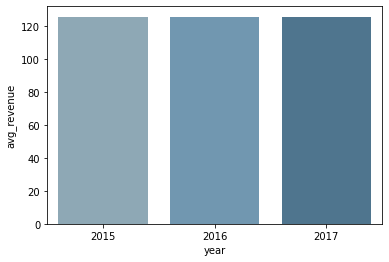

In [32]:
ax = sns.barplot(data=df_avg_rev.reset_index(), x='year', y='avg_revenue', palette= ['#8ab', '#69b', '#479'])

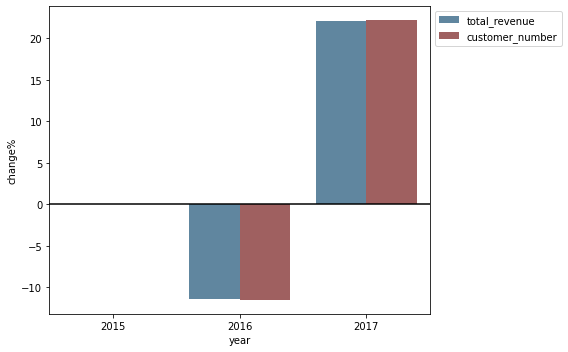

In [33]:
plt.figure(figsize=(8, 5))
foo = pd.concat([df_total_rev, df_cus_count], axis=0).reset_index()
ax = sns.barplot(data=foo, x='year', y='change%', hue='type', palette= ['#5588aa', '#aa5555'])

plt.grid(False)
ynew = 0
ax.axhline(ynew, color='000000')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

In [34]:
#revenue contribution by customer type (new or exist)
def check_new_customer(x):
    cust_list = {
        'new': {2015: [], 2016: new_cus_2016, 2017: new_cus_2017},
    }
    if x['year'] == 2017 and x['customer_email'] in back_cust_list:
        return 'back'
    elif x['customer_email'] in cust_list['new'][x['year']]:
        return 'new'
    else:
        return 'old'

back_cust_list = (cus_list_2015 & cus_list_2017) - cus_list_2016
df['customer_type'] = df.apply(lambda x: check_new_customer(x), axis=1)

In [35]:
revenue_sum = pd.pivot_table(df, values='net_revenue', index='year', columns='customer_type', aggfunc='sum', fill_value=0)
revenue_proportion = pd.crosstab(values=df['net_revenue'], index=df['year'], columns=df['customer_type'], aggfunc='sum', normalize='index')

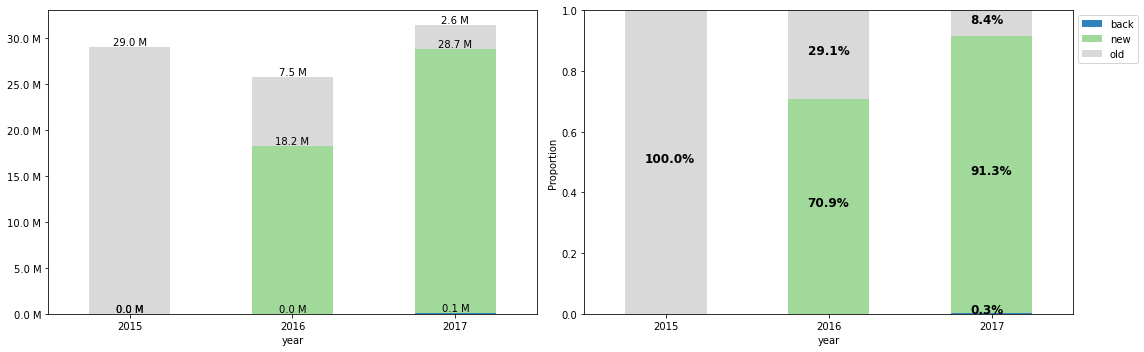

In [36]:
@ticker.FuncFormatter
def million_formatter(x, pos):
    return "%.1f M" % (x/1E6)

f, axes = plt.subplots(1, 2, figsize=(16,5))
ax1 = revenue_sum.plot(kind='bar', 
                stacked=True, 
                colormap='tab20c',
                ax=axes[0],
                legend=False,
                )


for bars in ax1.containers:
    bars_value = [million_formatter(v, 0) for v in bars.datavalues]
    ax1.bar_label(container=bars, labels=bars_value)

ax2 = revenue_proportion.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab20c',
                    ax=axes[1]
                    )

for n, x in enumerate([*revenue_proportion.index.values]):
    for (proportion, y_loc) in zip(revenue_proportion.loc[x],
                                   revenue_proportion.loc[x].cumsum()):
        
        if proportion == 0:
            continue
        plt.text(x=n - 0.13,
                 y=(y_loc - proportion) + (proportion / 2),
                 s=f'{np.round(proportion * 100, 1)}%', 
                 color="black",
                 fontsize=12,
                 fontweight="bold")

# format
ax1.yaxis.set_major_formatter(million_formatter)
ax1.tick_params(axis='x', rotation=0)
ax2.tick_params(axis='x', rotation=0)
ax2.set_ylim([0, 1])

plt.legend(loc="upper left", ncol=2)
plt.ylabel("Proportion")
plt.xticks(rotation=0)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()

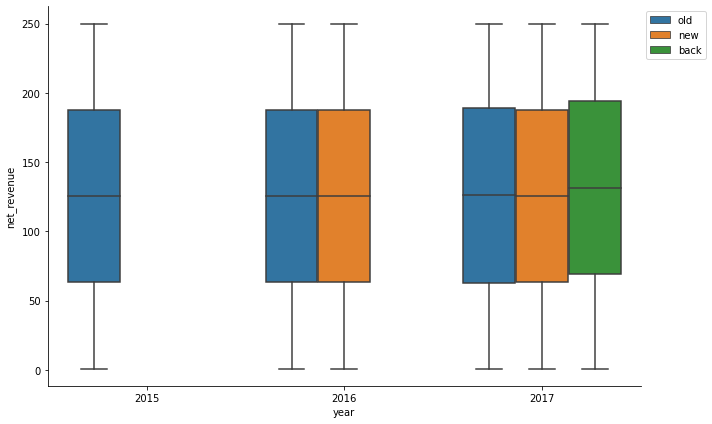

In [37]:
ax = plt.subplots(figsize = (10, 6))
ax = sns.boxplot(x='year', y='net_revenue', hue='customer_type', data=df, order = sorted(df['year'].unique()))
sns.despine()
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()